In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

### Simple graph representation



In [7]:
num_nodes = 100          ### Number of nodes in the graph
num_connections = 350    ### Number of connections

G = nx.Graph()

### create random nodes

for node in range(num_nodes):
    x = random.uniform(0,1000)
    y = random.uniform(0, 1000)
    urgent = random.randint(1, 10)
    transport_type = random.choice(['Road', 'Air', 'Sea', 'Train'])
    carriage_price = random.uniform(1000, 500000)

    G.add_node(node, pos = (x, y), transport = transport_type, price = carriage_price, urgency = urgent)
 


for _ in range(num_connections):
    source = random.randint(0, num_nodes - 1)
    target = random.randint(0, num_nodes - 1)
    if source!=target and not G.has_edge(source, target):
        G.add_edge(source, target)

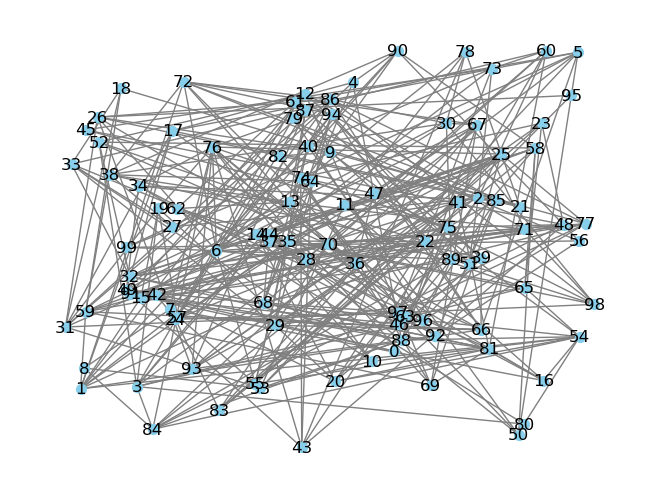

In [8]:
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels = True, node_size = 50, node_color = 'skyblue', edge_color = 'grey')

In [22]:
for node in G.nodes:
    attributes = G.nodes[node]
    print(f"Node:{node}, Transport type: {attributes['transport']}, Carriage: {attributes['price']}, Priority: {attributes['urgency']}")
    break

Node:0, Transport type: Sea, Carriage: 244262.29868094393, Priority: 3


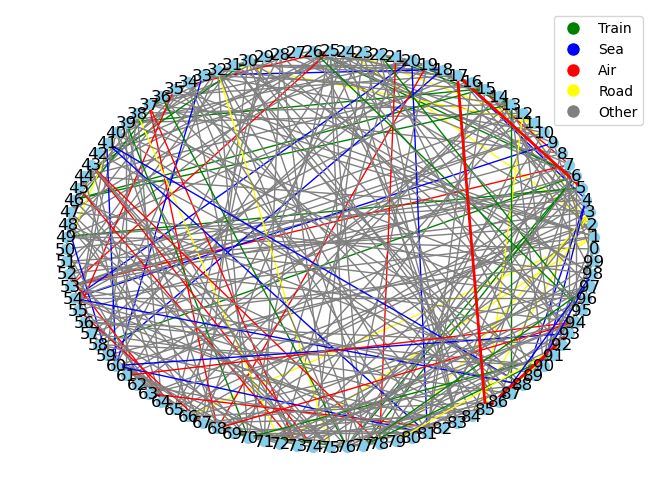

In [21]:
source_node = 5
target_node = 93


### blue for road
edge_color = []

shortest_path = nx.shortest_path(G, source = source_node, target = target_node)

for edge in G.edges:
    
    source, target = edge
    
    source_attrs = G.nodes[source]
    target_attrs = G.nodes[target]
    if source_attrs['transport'] == 'Road' and target_attrs['transport'] == 'Road':
        edge_color.append('yellow')
    elif source_attrs['transport'] == 'Train' and target_attrs['transport'] == 'Train':
        edge_color.append('green')
    elif source_attrs['transport'] == 'Sea' and target_attrs['transport'] == 'Sea':
        edge_color.append('blue')
    elif source_attrs['transport'] == 'Air' and target_attrs['transport'] == 'Air':
        edge_color.append('red')
    else:
        edge_color.append('gray')
    
    
    
    
    
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50, node_color='skyblue', edge_color=edge_color)

# Highlight the shortest path
shortest_path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='red', width=2.0)


# Create legend for transportation types
legend_labels = {'Train': 'Train', 'Sea': 'Sea', 'Air': 'Air', 'Road': 'Road', 'Other':'Other'}
legend_entries = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[transport_type], markerfacecolor=color, markersize=10) for transport_type, color in zip(['Train', 'Sea', 'Air', 'Road', 'Other'], ['green', 'blue', 'red', 'yellow', 'grey'])]
plt.legend(handles=legend_entries)


### OOP, same idea

In [58]:
class Node:
    def __init__(self, pos, transport, price, priority):
        self.pos = pos
        self.transport = transport
        self.price = price
        self.priority = priority

class Edge:
    def __init__(self, source, target):
        self.source = source
        self.target = target

class TransportGraph:
    def __init__(self, num_nodes, num_edges):
        self.G = nx.Graph()
        self.nodes = []
        self.edges = []
        
        for node in range(num_nodes):
            x = random.uniform(0, 100)
            y = random.uniform(0, 100)
            transport_type = random.choice(['Train', 'Sea', 'Air', 'Road'])
            carriage_price = random.uniform(1000, 500000)
            priority = random.randint(1, 10)
            
            self.nodes.append(Node((x, y), transport_type, carriage_price, priority))
            self.G.add_node(node, pos=(x, y), transport=transport_type, price=carriage_price, priority=priority)
            
        for _ in range(num_edges):
            source = random.randint(0, num_nodes - 1)
            target = random.randint(0, num_nodes - 1)
            
            if source != target and not self.G.has_edge(source, target):
                self.edges.append(Edge(source, target))
                self.G.add_edge(source, target, transport=transport_type, price=carriage_price, priority=priority)
                
    def shortest_path(self, source_node, target_node):
        return nx.shortest_path(self.G, source=source_node, target=target_node)

    def visualize_graph(self, shortest_path=None):
        pos = nx.get_node_attributes(self.G, 'pos')
    
        # Map transport types to colors
        transport_colors = {'Train': 'yellow', 'Sea': 'blue', 'Air': 'green', 'Road': 'red', 'Combined': 'grey'}
        node_colors = [transport_colors[node.transport] for node in self.nodes]
    
        nx.draw(self.G, pos, with_labels=True, node_size=15, node_color=node_colors, edge_color='gray', width=.95)
    
        if shortest_path:
            shortest_path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
            nx.draw_networkx_edges(self.G, pos, edgelist=shortest_path_edges, edge_color='red', width=2)
    
        legend_labels = {'Train': 'Train', 'Air': 'Air', 'Sea': 'Sea', 'Road': 'Road', 'Combined': 'Combined'}
        legend_entries = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[transport_type], markerfacecolor=color, markersize=10) for transport_type, color in transport_colors.items()]
        plt.legend(handles=legend_entries)

        plt.show()



Introduce the number of nodes in the network:  100
Introduce the total number of edges in the network:  178
Introduce a number representing the starting position for the shortest path:  34
Introduce a number representing the ending position for the shortest path:  7


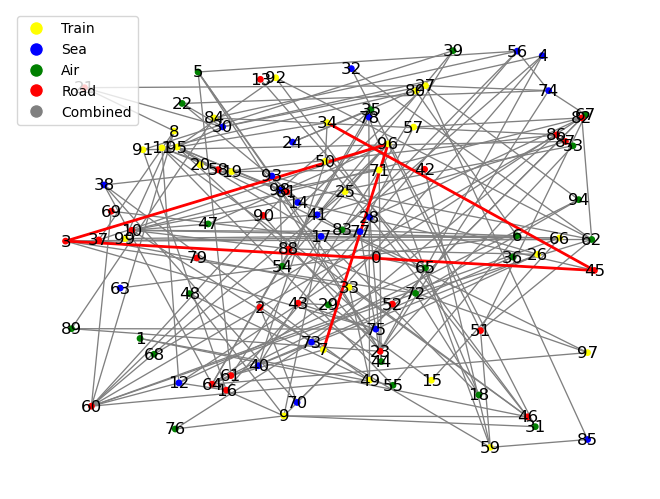

Introduce a number representing the starting position for the shortest path:  0 
Introduce a number representing the ending position for the shortest path:  0


In [60]:
num_nodes = int(input("Introduce the number of nodes in the network: "))

num_edges = int(input('Introduce the total number of edges in the network: '))

simulation = TransportGraph(num_nodes, num_edges)

k = 1

while k:
    
    source_node = int(input("Introduce a number representing the starting position for the shortest path: "))
    target_node = int(input("Introduce a number representing the ending position for the shortest path: "))
    
    if source_node == 0 and target_node == 0:
        k = 0
        break
    else:
        
        shortest_path = simulation.shortest_path(source_node, target_node)
        simulation.visualize_graph(shortest_path)
    
    

In [61]:
shortest_path

[34, 45, 3, 96, 7]